# Importing required modules and loading data files

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
fruits = pd.read_table(r"C:\Users\KIIT\Desktop\ml coursera\fruit_data_with_colors.txt")

In [5]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


creating a mapping from fruit labelvalue to fruit name to make results easier to interpret

In [6]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Examining the data

plotting a scatter matrix and dividing the data into test and train data

<IPython.core.display.Javascript object>


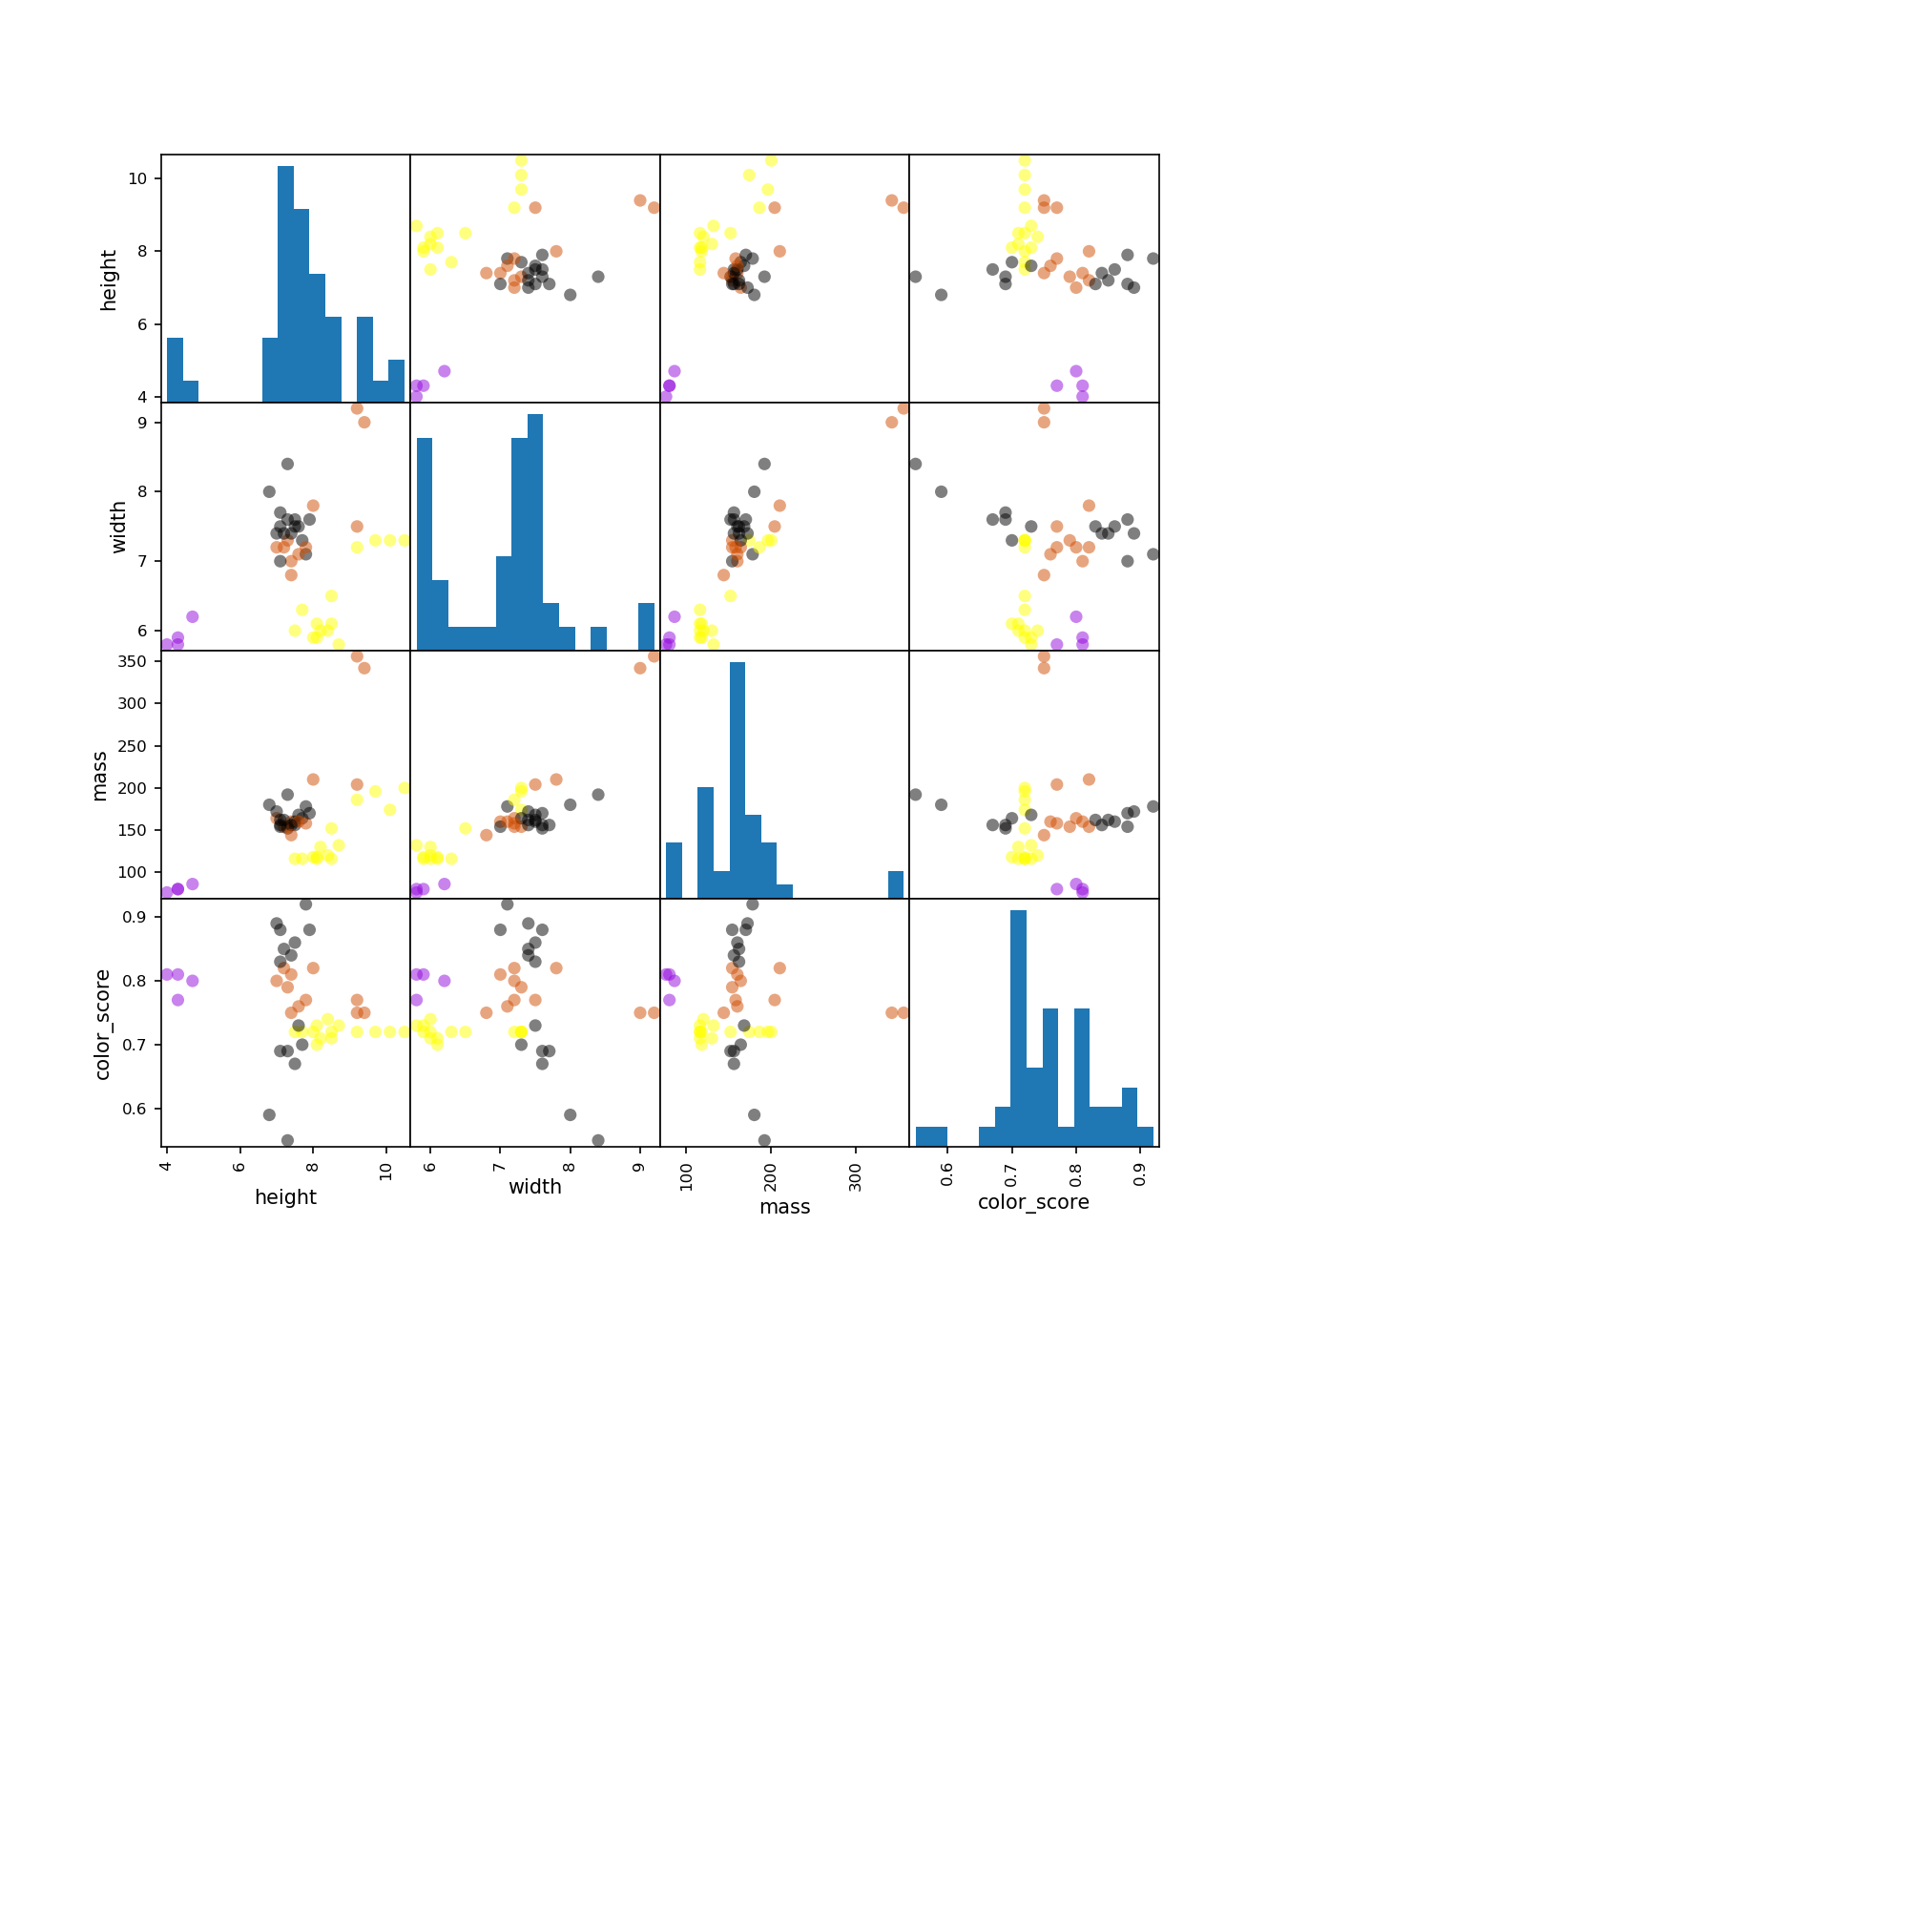

In [8]:
from matplotlib import cm
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

plotting a 3D scatter plot

<IPython.core.display.Javascript object>


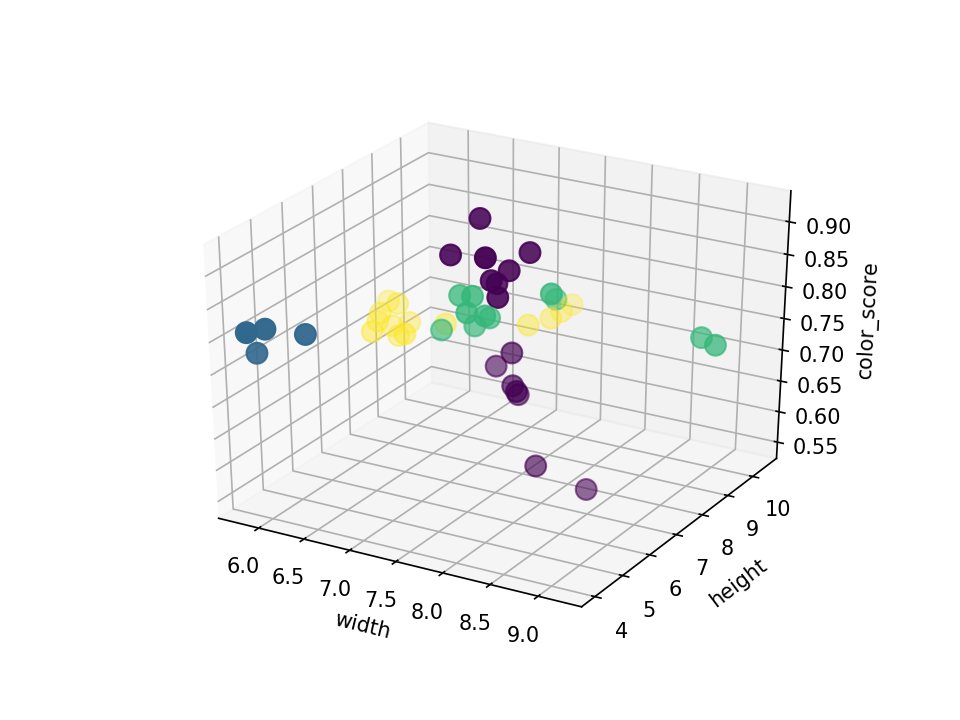

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## Creating test-train split 
(For this example, using mass, width, and height features of each fruit instance)

In [10]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75%/25% train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Creating classifier object

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

## Training the classifier (fitting the estimator) using the training data

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Estimating the accuracy of the classifier on future data, using the test data

In [13]:
knn.score(X_test, y_test)

0.5333333333333333

## Using the trained k-NN classifier model to classify new, previously unseen data

In [14]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [15]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

## Plotting the decision boundaries of the k-NN classifier

In [17]:
#from adspy_shared_utilities import plot_fruit_knn
#plot_fruit_knn(X_train, y_train, 5, 'uniform')
# since this is a part of the cource so can't access these

## How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


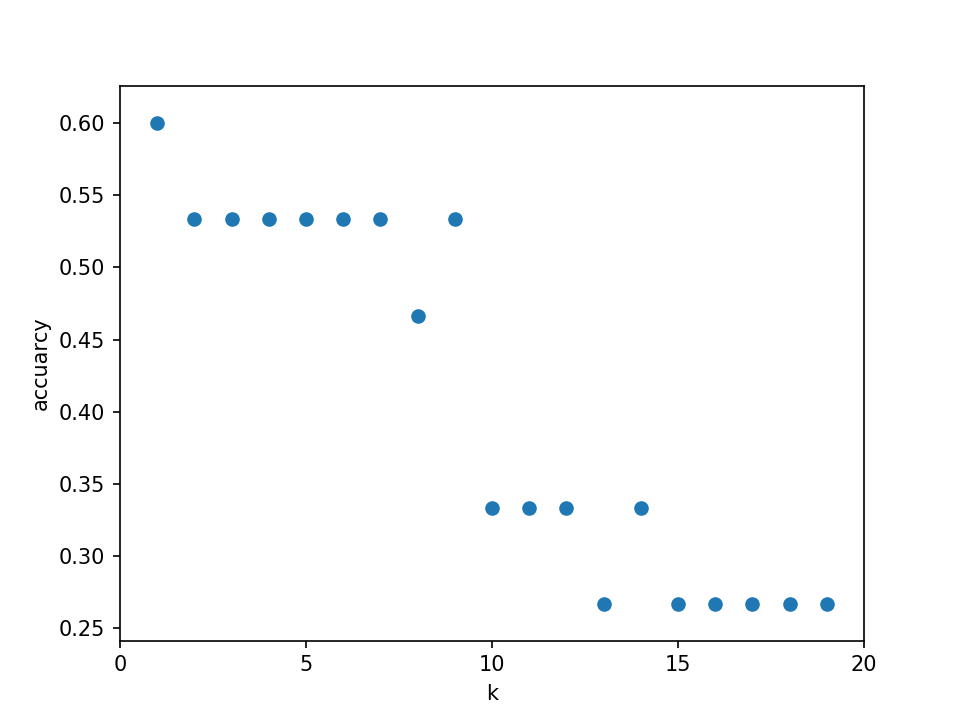

In [19]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuarcy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

## How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


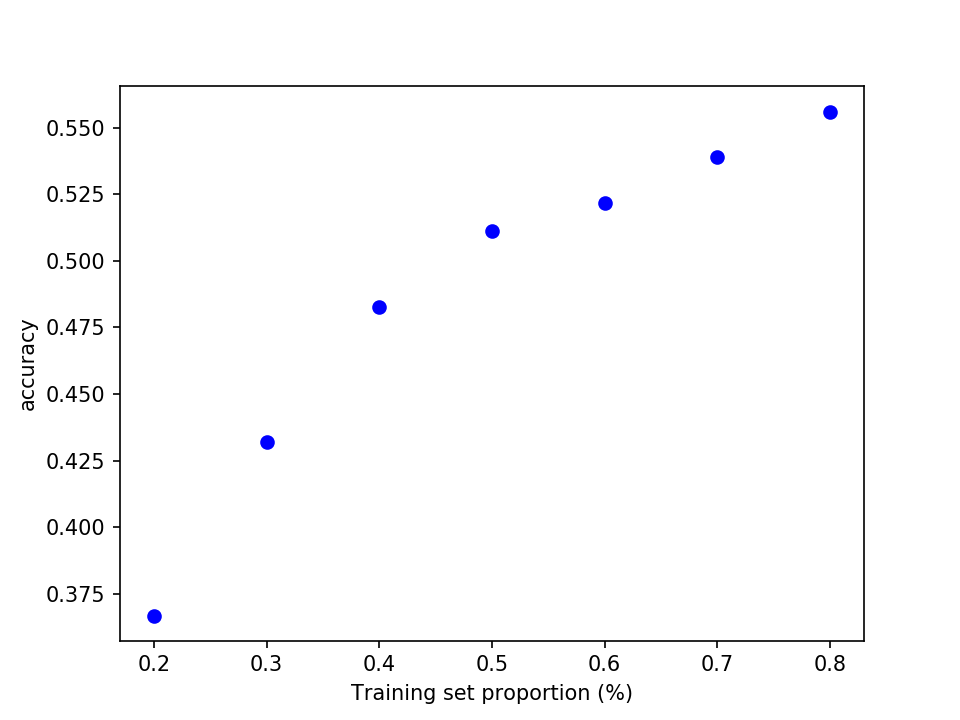

Text(0, 0.5, 'accuracy')

In [22]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors = 5)
plt.figure()
for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')